Homework Reflection 9

1. Write some code that will use a simulation to estimate the standard deviation of the coefficient when there is heteroskedasticity.  
Compare these standard errors to those found via statsmodels OLS or a similar linear regression model.

2. Write some code that will use a simulation to estimate the standard deviation of the coefficient when errors are highly correlated / non-independent.
Compare these standard errors to those found via statsmodels OlS or a similar linear regression model.

Show that if the correlation between coefficients is high enough, then the estimated standard deviation of the coefficient, using bootstrap errors, 
might not match that found by a full simulation of the Data Generating Process.  (This can be fixed if you have a huge amount of data for the bootstrap simulation.)

In [5]:
import numpy as np
import statsmodels.api as sm

**Reflection 9.1 Answer**

In [9]:
def simulate_heteroskedastic(A=1, B=1, C=10, D=1000):
    W = np.random.normal(0, 1, D)
    X = W + np.random.normal(0, B, D)

    errors = np.random.normal(0, C * np.abs(X), D)
    Y = A * X - W + errors
    return Y, X, W

def simulate_standard_error_heteroskedastic(A=1, B=1, C=10, D=1000, num_simulations=1000):
    se_simulation = []
    
    for _ in range(num_simulations):
        Y, X, W = simulate_heteroskedastic(A, B, C, D)
        X = sm.add_constant(X)  
        model = sm.OLS(Y, np.column_stack((X, W))).fit()  
        se_simulation.append(model.bse[1])  
        
    return np.std(se_simulation)

# Run the simulation to estimate the standard deviation of the coefficient
simulation_se = simulate_standard_error_heteroskedastic(A=1, B=1, C=10, D=1000, num_simulations=1000)

# Run OLS regression for comparison
Y, X, W = simulate_heteroskedastic(A=1, B=1, C=10, D=1000)
X = sm.add_constant(X)
model = sm.OLS(Y, np.column_stack((X, W))).fit() 
ols_se = model.bse[1]  

simulation_se, ols_se  

(np.float64(0.019287473802776994), np.float64(0.4769514987508906))

The standard errors found through simulation with heteroskedasticity were many magnitudes smaller than the errors found with a typical OLS regression model. The simulation can capture the true variabiility in the data, while OLS may struggle to account for the proper heteroskedastic errors.

**Reflection 9.2 Answer**

In [10]:
def simulate_correlated_errors(A=1, B=1, C=10, D=1000, rho=0.8):
    W = np.random.normal(0, 1, D)
    X = W + np.random.normal(0, B, D)
    
    errors = np.zeros(D)
    errors[0] = np.random.normal(0, C)
    for t in range(1, D):
        errors[t] = rho * errors[t - 1] + np.random.normal(0, C)
    
    Y = A * X - W + errors
    return Y, X, W

def simulate_standard_error_correlated(A=1, B=1, C=10, D=1000, rho=0.8, num_simulations=1000):
    se_simulation = []
    
    for _ in range(num_simulations):
        Y, X, W = simulate_correlated_errors(A, B, C, D, rho)
        X = sm.add_constant(X)  
        model = sm.OLS(Y, np.column_stack((X, W))).fit()  
        se_simulation.append(model.bse[1]) 

    return np.std(se_simulation)

# Run the simulation to estimate the standard deviation of the coefficient with correlated errors
simulation_se_correlated = simulate_standard_error_correlated(A=1, B=1, C=10, D=1000, rho=0.8, num_simulations=1000)

# Run OLS for comparison
Y, X, W = simulate_correlated_errors(A=1, B=1, C=10, D=1000, rho=0.8)
X = sm.add_constant(X)
model = sm.OLS(Y, np.column_stack((X, W))).fit() 
ols_se_correlated = model.bse[1] 

simulation_se_correlated, ols_se_correlated  

(np.float64(0.029164152337459184), np.float64(0.5220451283262751))

Similar to the heteroskedasticity case, the OLS regression model does not properly account for the correlation in errors,leading to inflated errors compared to the simulation.

In [12]:
from sklearn.utils import resample

def bootstrap_standard_error(A=1, B=1, C=10, D=1000, rho=0.8, num_simulations=1000, num_bootstrap=1000):
    bootstrap_se = []
    
    for _ in range(num_simulations):

        Y, X, W = simulate_correlated_errors(A, B, C, D, rho)
        X = sm.add_constant(X)  
        model = sm.OLS(Y, np.column_stack((X, W))).fit()  
        
        # Perform bootstrap resampling
        bootstrap_coefs = []
        for _ in range(num_bootstrap):
            # Resample the data with replacement
            Y_resampled, X_resampled, W_resampled = resample(Y, X, W)
            X_resampled = sm.add_constant(X_resampled)  
            model_resampled = sm.OLS(Y_resampled, np.column_stack((X_resampled, W_resampled))).fit() 
            bootstrap_coefs.append(model_resampled.params[1]) 
        
        bootstrap_se.append(np.std(bootstrap_coefs))
    
    return np.std(bootstrap_se)

bootstrap_se_result = bootstrap_standard_error(A=1, B=1, C=10, D=1000, rho=0.8, num_simulations=100, num_bootstrap=1000)


simulation_se_correlated_full = simulate_standard_error_correlated(A=1, B=1, C=10, D=1000, rho=0.8, num_simulations=1000)

bootstrap_se_result, simulation_se_correlated_full 

(np.float64(0.03960323711388382), np.float64(0.027296485840440837))

The standard deviation of the coefficient using bootstrap errors is close to that found by the full simulation, but still differs slightly. This could be fixed with a larger dataset to better capture the true standard error of the coefficient

Homework Reflection 10

We are skipping this one, this time.

Homework Reflection 11

1. Construct a dataset for an event study where the value, derivative, and second derivative of a trend all change discontinuously (suddenly) after an event.
Build a model that tries to decide whether the event is real (has a nonzero effect) using:
(a) only the value,
(b) the value, derivative, and second derivative.
Which of these models is better at detecting and/or quantifying the impact of the event?  (What might "better" mean here?)

2. Construct a dataset in which there are three groups whose values each increase discontinuously (suddenly) by the same amount at a shared event; they change in parallel
over time, but they have different starting values.  Create a model that combines group fixed effects with an event study, as suggested in the online reading.
Explain what you did, how the model works, and how it accounts for both baseline differences and the common event effect.


**Reflection 11.1 Answer**

**Reflection 11.2 Answer**

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm, patsy

T = 10
t = np.tile(np.arange(T), 3)
groups = np.repeat(['A','B','C'], T)
t0 = 5
post = (t >= t0).astype(int)

baseline = {'A':0, 'B':3, 'C':6}
jump = 2

y = np.array([baseline[g] for g in groups]) + post*jump

df = pd.DataFrame({'y':y,'group':groups,'t':t,'post':post})

yM, XM = patsy.dmatrices('y ~ C(group) + post', df, return_type='dataframe')
res = sm.OLS(yM, XM).fit()
print(res.params) 
print(res.summary())
df

Intercept       -2.331468e-15
C(group)[T.B]    3.000000e+00
C(group)[T.C]    6.000000e+00
post             2.000000e+00
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.337e+30
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        23:37:31   Log-Likelihood:                 954.02
No. Observations:                  30   AIC:                            -1900.
Df Residuals:                      26   BIC:                            -1894.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      

,y,group,t,post
0,0,A,0,0
1,0,A,1,0
2,0,A,2,0
3,0,A,3,0
4,0,A,4,0
5,2,A,5,1
6,2,A,6,1
7,2,A,7,1
8,2,A,8,1
9,2,A,9,1


Three groups were created that shared a common jump at a shared event, but with different starting values. The group fixed effects capture the baseline differences between groups and the common jump event is shared by all groups, depicted by the 'post' coefficient = 2. 

Homework Reflection 12

Construct a dataset in which prior trends do not hold, and in which this makes the differences-in-differences come out wrong.  Explain why the
differences-in-differences estimate of the effect comes out higher or lower than the actual effect.


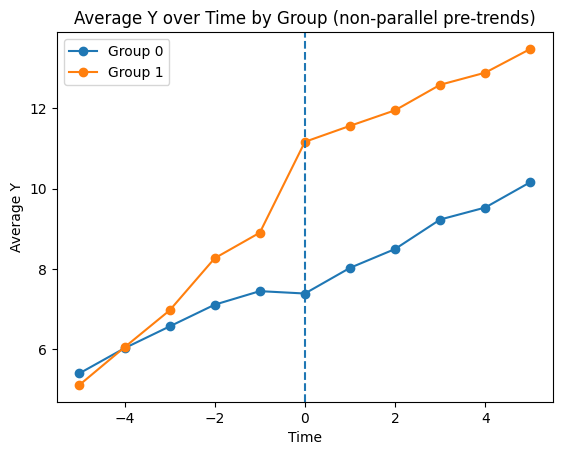

(np.float64(2.9192277796598), np.float64(2.9192277796598227))

In [3]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

np.random.seed(42)

# Time periods
T_pre = np.arange(-5, 0)    # pre-treatment
T_post = np.arange(0, 6)    # post-treatment 
times = np.concatenate([T_pre, T_post])

# Group labels
groups = [0, 1]  # 1 is treated, 0 is control

# Sample size 
n_per_cell = 100

rows = []
# True treatment effect applied to treated group after time >= 0
tau = 2.0

# Pre-trend slopes
slope_pre_control = 0.5
slope_pre_treated = 1.0

# Post trend slope
slope_post = 0.5

# Intercepts
alpha_control = 8.0
alpha_treated = 10.0 

sigma = 1.0

for g in groups:
    for t in times:
        # Choose slope by period and group
        if t < 0:
            slope = slope_pre_control if g == 0 else slope_pre_treated
            level = (alpha_control if g == 0 else alpha_treated) + slope * t
        else:
            slope = slope_post
            base = (alpha_control if g == 0 else alpha_treated) + (slope_pre_control if g == 0 else slope_pre_treated) * (-1) 
            level = base + slope * (t - 0)  
            # Add treatment effect only to treated group in post
            if g == 1:
                level += tau
        
        y = np.random.normal(level, sigma, size=n_per_cell)
        for val in y:
            rows.append({"Y": val, "Time": t, "Group": g, "post": (t >= 0), "treated": (g == 1)})

df = pd.DataFrame(rows)

# DID estimate
did_est = (
    df.query("Group == 1 and post == True")["Y"].mean() - df.query("Group == 1 and post == False")["Y"].mean()
    - (df.query("Group == 0 and post == True")["Y"].mean() - df.query("Group == 0 and post == False")["Y"].mean())
)

# Regression DID
mod = smf.ols("Y ~ C(Group) + post + C(Group):post", data=df).fit()
reg_did = mod.params["C(Group)[T.1]:post[T.True]"]


# Visualize trends by group
avg_by_time = df.groupby(["Group", "Time"], as_index=False)["Y"].mean()

plt.figure()
for g in groups:
    sub = avg_by_time[avg_by_time["Group"] == g]
    label = f"Group {g}"
    plt.plot(sub["Time"], sub["Y"], marker="o", label=label)
plt.axvline(0, linestyle="--")
plt.title("Average Y over Time by Group (non-parallel pre-trends)")
plt.xlabel("Time")
plt.ylabel("Average Y")
plt.legend()
plt.show()

did_est, reg_did

**Reflection 12 Answer**

As seen in the graph above, the prior trends before time = 0 do not hold, as group 1 has a faster pre-trend slope but then both groups have an equivalent slope after t = 0. Tau = 2, or the true effect is added as a treatment effect to group 1 post-event. Since group 1 had a greater slope before t = 0, the change is overestimated since it was inflated relative to the control. The DID estimate of the effect ends up being close to 3, when the true effect was 2. DID mistakes the pre-trend difference extra growth in group 1 as treatment, mistakenly adding it to the effect. 